In [2]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
from mne.preprocessing import ICA,read_ica

In [3]:
#read the ica file from the folder
sample_data_raw_file=('C:/Users/user/Desktop/ICA/04062019 1_ica.fif')
raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)
raw_temp=raw.copy()#.crop(600., 620.) #Copy the raw data and crop the 30 sec data basically skype call
raw_ch = raw_temp.pick_channels(['F7', 'F3', 'F4', 'F8']) # select only one channel

Opening raw data file C:/Users/user/Desktop/ICA/04062019 1_ica.fif...


<ipython-input-3-1c34a7698457>:3: RuntimeWarning: This filename (C:/Users/user/Desktop/ICA/04062019 1_ica.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz or _meg.fif
  raw = mne.io.read_raw_fif(sample_data_raw_file, preload=True)


    Range : 0 ... 320127 =      0.000 ...  2500.992 secs
Ready.
Reading 0 ... 320127  =      0.000 ...  2500.992 secs...


In [4]:
raw_temp.info['ch_names']

['F7', 'F3', 'F4', 'F8']

5124
[[ 8.19073849e-06 -1.02391083e-06  1.69274160e-06 ...  4.01083720e-06
   5.87759474e-06  5.22911274e-06]
 [ 2.84374915e-06  1.19726529e-05  1.02432336e-05 ...  6.07769156e-07
   3.62446538e-06  3.83282066e-06]
 [-4.92864792e-06 -2.26875262e-06  1.23095546e-06 ... -5.01683135e-06
  -4.82876735e-06 -4.63298883e-06]
 [ 1.16597773e-05  5.36107981e-06  8.97967627e-06 ... -3.70733151e-06
  -3.16049537e-06 -3.23716870e-06]]


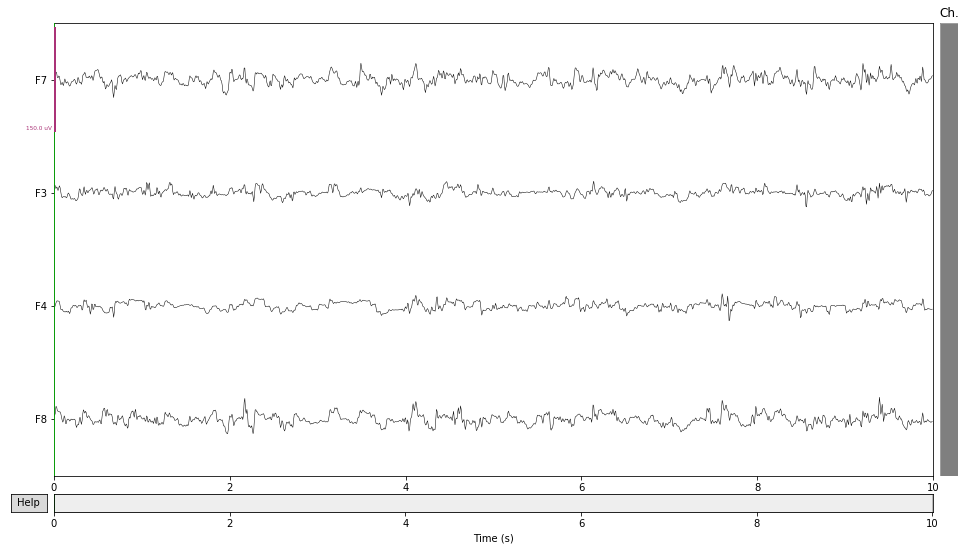

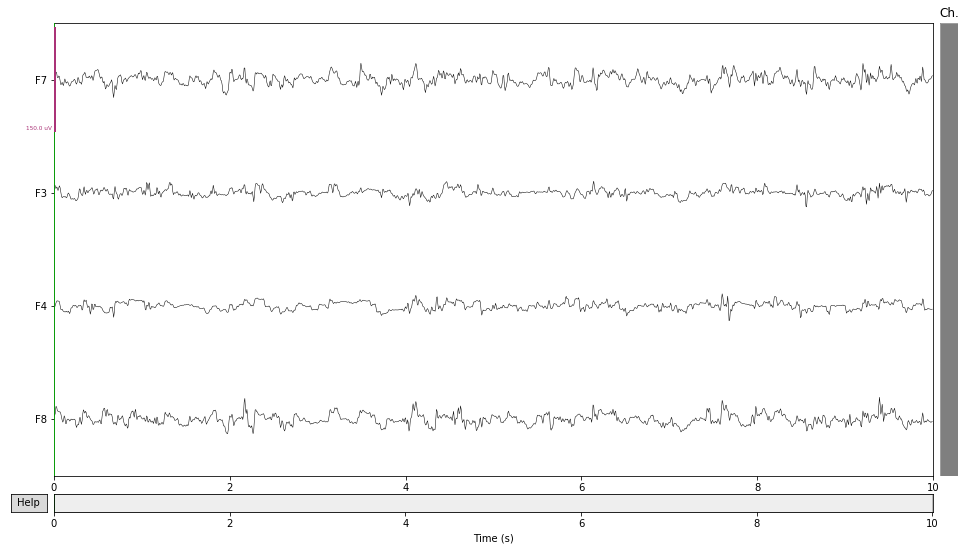

In [5]:
sk_bf =raw_ch.copy().crop(657., 667)# copy the data
sk_af =raw_ch.copy().crop(669., 679.)
m1_bf =raw_ch.copy().crop(1126., 1136.)
m1_af =raw_ch.copy().crop(1146., 1156.)
m2_bf =raw_ch.copy().crop(1250., 1260.)
m2_af =raw_ch.copy().crop(1277., 1287.)
ph_4_bf =raw_ch.copy().crop(1605., 1615.)
ph_4_af =raw_ch.copy().crop(1655., 1665.)



data,times = sk_bf[:]
print(data.size)
print(data)
sk_bf.plot(scalings={"eeg": 75e-6})

In [6]:
#data0,times0 = ph0[:] #extract times and data
#print(len(data))
#print(data.shape)
#s=1/times
#print(len(s))
#plt.plot(times, data.T)
#plt.show()
#data_sk,times_sk= ph1_sk[:] 
#data_m1,times_m1= ph2_m1[:]
#data_m2,times_m2= ph2_m2[:]
#data_3,times_3= ph_3[:]
#data_4,times_4= ph_4[:]
#data_5,times_5= ph_5[:]

In [7]:
from mne.time_frequency import psd_welch
def eeg_power_band(data):
    """EEG power band feature extraction.


    """
    # specific frequency bands
    FREQ_BANDS = {#"delta": [0.5, 4.5],
                  "theta": [4, 8],
                  "alpha": [8, 13],
                  "beta": [13, 30],
                  "gamma": [30, 56]}

    psds, freqs = psd_welch(data, picks=['F7', 'F3', 
                                          'F4', 'F8'],
                            fmin=4, fmax=56.)
    
    #print(psds.shape)
    #print(freqs.shape)
    #plt.semilogy(freqs, (psds.T))
    #plt.xlabel('frequency [Hz]')
    #plt.ylabel('Linear spectrum [V RMS]')
    #plt.show()
    # Normalize the PSDs
    psds /= np.sum(psds, axis=-1, keepdims=True)

    X = []
    for fmin, fmax in FREQ_BANDS.values():
        psds_band = psds[:,  (freqs >= fmin) & (freqs < fmax)].mean(axis=-1)    #:,
        X.append(psds_band.reshape(len(psds), -1))

    return np.concatenate(X, axis=1)

In [9]:
power_0 = eeg_power_band(sk_bf)
print(power_0)
power_1 = eeg_power_band(sk_af)
print(power_1)
power_2 = eeg_power_band(m1_bf)
power_3 = eeg_power_band(m1_af)
power_4 = eeg_power_band(m2_bf)
power_5 = eeg_power_band(m2_af)
power_6 = eeg_power_band(ph_4_bf)
power_7 = eeg_power_band(ph_4_af)

Effective window size : 2.000 (s)
[[0.04475582 0.02790644 0.00787114 0.0018321 ]
 [0.04027149 0.02534546 0.00762435 0.00317572]
 [0.04601502 0.02109723 0.00909461 0.00214783]
 [0.05408866 0.01987401 0.0073024  0.00231281]]
Effective window size : 2.000 (s)
[[0.05437906 0.01795938 0.00804782 0.00214896]
 [0.04396576 0.02718553 0.00791085 0.00206629]
 [0.05165045 0.02756638 0.00677232 0.00155514]
 [0.04649449 0.02569441 0.00724399 0.00240005]]
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)
Effective window size : 2.000 (s)


In [10]:
import pandas as pd
ch_name = ['F7', 'F3',  'F4', 'F8']
column = ["theta","alpha","beta","gamma"]

#print(F1)


In [11]:
df_0= pd.DataFrame(power_0, columns = column)
F0 = df_0.assign(**{'ch_name':ch_name,
               'phase': 0})
F0
df_1= pd.DataFrame(power_1, columns = column)
F1 = df_1.assign(**{'ch_name':ch_name,
               'phase': 1})
df_2= pd.DataFrame(power_2, columns = column)
F2 = df_2.assign(**{'ch_name':ch_name,
               'phase': 2})
df_3= pd.DataFrame(power_3, columns = column)
F3 = df_3.assign(**{'ch_name':ch_name,
               'phase': 3})
df_4= pd.DataFrame(power_4, columns = column)
F4 = df_4.assign(**{'ch_name':ch_name,
               'phase': 4})
df_5= pd.DataFrame(power_5, columns = column)
F5 = df_5.assign(**{'ch_name':ch_name,
               'phase': 5})
df_6= pd.DataFrame(power_6, columns = column)
F6 = df_6.assign(**{'ch_name':ch_name,
               'phase': 6})
df_7= pd.DataFrame(power_7, columns = column)
F7 = df_7.assign(**{'ch_name':ch_name,
               'phase': 7})

In [9]:
result =result = pd.concat([F0,F1,F2,F3,F4,F5,F6,F7], sort=False)
result.set_index('phase',inplace=True)
result

,theta,alpha,beta,gamma,ch_name
phase,,,,,
0,0.044756,0.027906,0.007871,0.001832,F7
0,0.040271,0.025345,0.007624,0.003176,F3
0,0.046015,0.021097,0.009095,0.002148,F4
0,0.054089,0.019874,0.007302,0.002313,F8
1,0.054379,0.017959,0.008048,0.002149,F7
1,0.043966,0.027186,0.007911,0.002066,F3
1,0.051650,0.027566,0.006772,0.001555,F4
1,0.046494,0.025694,0.007244,0.002400,F8
2,0.063199,0.015891,0.007743,0.001389,F7


In [10]:
#save the data to a csv_file.
result.to_csv('C:/Users/user/Desktop/Instred_feature/frequency domain/10 second/04062019 1.csv')